In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import torch
import importlib
import cv2
import pandas as pd
from PIL import Image
from IPython.display import display



In [4]:
%cd YOLOX

/home/yang/Documents/GitHub/Notes/Kaggle/YOLOX


In [9]:
from yolox.utils import postprocess
from yolox.data.data_augment import ValTransform

CHECKPOINT_FILE = "./YOLOX_outputs/cots_config/epoch_20_ckpt.pth"

In [11]:
COCO_CLASSES = ("starfish")

current_exp = importlib.import_module("cots_config")
exp = current_exp.Exp()

test_size = (800, 1280)
num_classes = 1
confthre = 0.1
nmsthre = 0.4

model = exp.get_model()
model.cuda()
model.eval()

ckpt_file = CHECKPOINT_FILE
ckpt = torch.load(ckpt_file, map_location="cpu")
model.load_state_dict(ckpt["model"])

<All keys matched successfully>

In [16]:
def yolox_inference(img, model, test_size):
    bboxes = []
    bbclasses = []
    scores = []
    
    preproc = ValTransform(legacy = False)
    tensor_img, _ = preproc(img, None, test_size)
    tensor_img = torch.from_numpy(tensor_img).unsqueeze(0)
    tensor_img = tensor_img.float()
    tensor_img = tensor_img.cuda()
    
    with torch.no_grad():
        outputs = model(tensor_img)
        outputs = postprocess(
                    outputs, num_classes, confthre,
                    nmsthre, class_agnostic=True
        )
    if outputs[0] is None:
        return [], [], []
    
    outputs = outputs[0].cpu()
    bboxes = outputs[:, 0:4]
    bboxes /= min(test_size[0]/img.shape[0], test_size[1]/img.shape[1])
    bbclasses = outputs[:, 6]
    scores = outputs[:, 4] * outputs[:, 5]
    return bboxes, bbclasses, scores
    

In [21]:
def draw_yolox_predictions(img, bboxes, scores, bbclasses, confthre, classes_dict):
    for i in range(len(bboxes)):
        box = bboxes[i]
        cls_id = int(bbclasses[i])
        score = scores[i]
        if score < confthre:
            continue
        x0 = int(box[0])
        y0 = int(box[1])
        x1 = int(box[2])
        y1 = int(box[3])
        
        cv2.rectangle(img, (x0, y0), (x1, y1), (0, 255, 0), 2)
        cv2.putText(img, "{}:{:.1f}".format(classes_dict[cls_id], score * 100), (x0, y0-3), cv2.FONT_HERSHEY_PLAIN, 0.8, (0, 255, 0), thickness = 1)
        return img

In [22]:
TEST_IMAGE_PATH = "/home/yang/code_Dev/Kaggle/COTS/dataset/images/val2017/0-878.jpg"
img = cv2.imread(TEST_IMAGE_PATH)

In [23]:
bboxes, bbclasses, scores = yolox_inference(img, model, test_size)


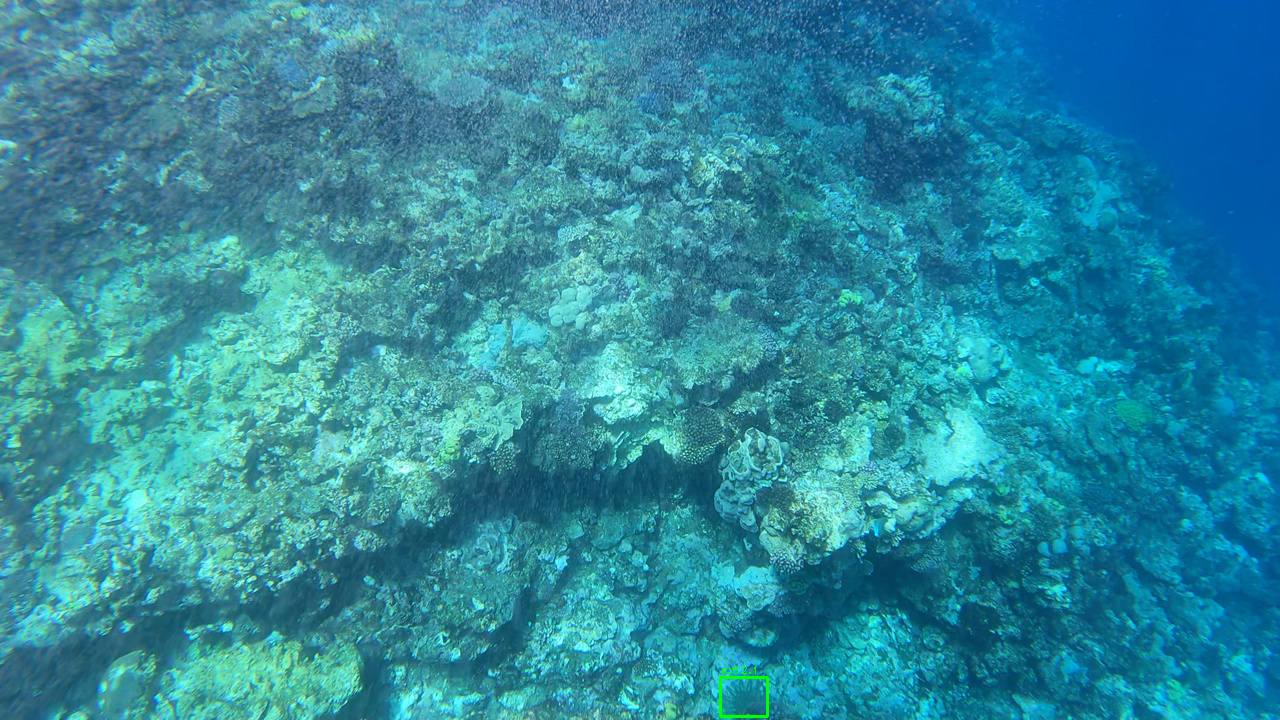

In [24]:
out_image = draw_yolox_predictions(img, bboxes, scores, bbclasses, confthre, COCO_CLASSES)

out_image = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(out_image))

In [26]:
%cd ..

/home/yang/Documents/GitHub/Notes/Kaggle


In [27]:
import greatebarrierreef

ModuleNotFoundError: No module named 'greatebarrierreef'